# Flight delays from New York 2019

## by Sophia Felippe

## Investigation Overview

> I looked at the flights from New York over the 4 quarters of 2019 to see what effected their amount of delay. The main focus was delay time, flight time, quarters type of delays.

## Dataset Overview

The data first 100000 rows about flights, I dropped the rows with missing data and was left with 17 columns and 23070 rows. This included airlines, time of flights, day of week. 

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# load in the dataset into a pandas dataframe
flights = pd.read_csv('flights_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
This shows that departure delay increases as time does. This was consistent with late aircraft and NAS delays. Weather happened in the morning and the evening, however only 4% of the flights were delayed due to weather so this may be why it is not so obvious. It can be seen that all 4 quarters follow the same trend with 3rd quarter having the most delays and the 4th quarter having the least. The least weather delays happened in the 4th quarter and the most in the 3rd. All 4 quarters had a positive correlation between weather delay and dep time. With carrier delay, the 3rd quarter was the highest and the 4th was the lowest. Security, same trend throughout the quarters. Late aircraft, 3rd and 4th quarter seemed to have the most delays with similar trends.

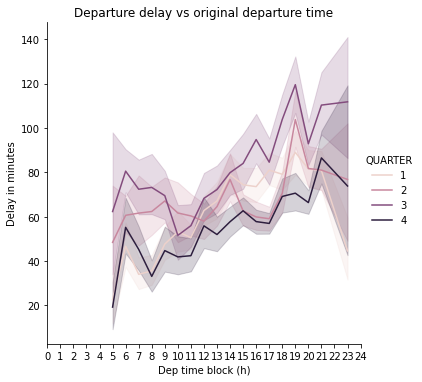

In [4]:

sb.relplot(x='DEP_TIME_BLK', y='DEP_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title('Departure delay vs original departure time')
plt.xlabel('Dep time block (h)')
plt.ylabel('Delay in minutes')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23, 24,]);


## (Visualization 2)

When looking at day of week and delay, it can be seen that the 3rd quarter has more delays overall with the most being on a Saturday, which is strange as least amount of flights seem to take off then too.I found that the 3rd quarter had more delays on a Saturday and less on a Tuesday, this strengthens what I found in the bivariate. The 1st and 4th quarter has lowest delays on a Sunday and highest on a Thursday. 4th quarter has less delays than the others with the least being on Sunday. The least delays seemed to happen midweek. For Malone, Tuesday was the lowest and JFK, Sunday was the lowest.

I found before that NAS was highest on a Thursday and this was found again in the 4th quarter but not in the 3rd. Security delay seemed to happen in the 1st quarter more on a Tuesday and on a Thursday in the other quarters. There was not much difference otherwise. I did not look at the other types of delay due to not finding a difference before.

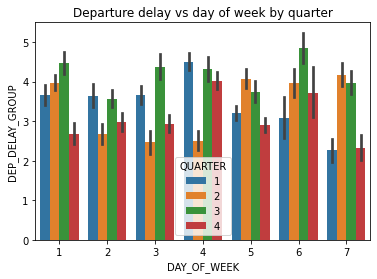

In [5]:

sb.barplot(y='DEP_DELAY_GROUP', x='DAY_OF_WEEK', hue='QUARTER', data=flights).set_title("Departure delay vs day of week by quarter");

## (Visualization 3)
Looking at airlines, delay and quarter. The 3rd quarter had the most general, weather, carrier and NAS delays, the lowest being in the 4th quarter. Results strengthened what I found before. YV had the highest delays overall of all 4 quarters, this was also seen when looking at weather delay in the 3rd quarter. OO had the most weather delays in the other quarters.

The error bar of HA was the biggest in the 3rd quarter (and this is when HA had the most carrier delays), but HA did not fly in the second quarter. YV only flew from Malone and had the most delays, whilst HA only flew from JFK. The airline with the most delays from JFK was OO.





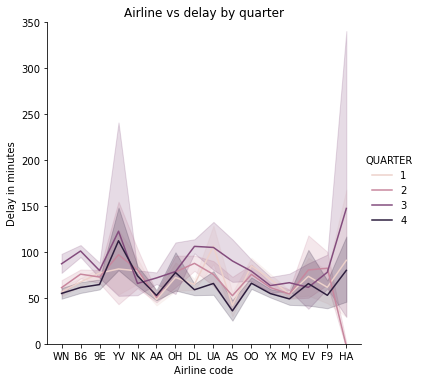

In [6]:

sb.relplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', hue='QUARTER',kind="line", data=flights)
plt.title("Airline vs delay by quarter")
plt.xlabel('Airline code')
plt.ylabel('Delay in minutes')
plt.ylim([0,350]);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

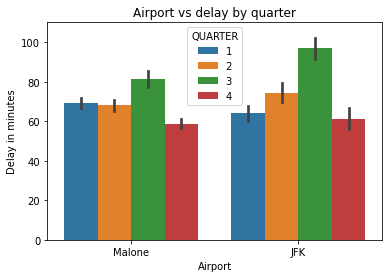

In [7]:

plt.figure()
sb.barplot(x='AIRPORT', y='DEP_DELAY', hue='QUARTER', data=flights)
plt.title("Airport vs delay by quarter")
plt.ylabel('Delay in minutes')
plt.ylim([0,110])
plt.xlabel('Airport');


# VISUALISATION 4
Overall, JFK had more weather, carrier and NAS delays than Malone, the 3rd quarter was the highest for all 3 types and the 2nd was the lowest for weather, but 1st was lower for NAS and carrier delays. For Malone, the 3rd quarter had the most delays in all 3 types and the 4th had the lowest weather delays, but the 1st quarter had the least carrier and NAS delays.

Malone had more security and late aircraft delays, both having more in the 4th quarter and least in the 1st. JFk had most late aircrafts in the 3rd quarter but most security delays in the 2nd. There were least late aircrafts in the 4th but lease secuirty delays in the 1st.

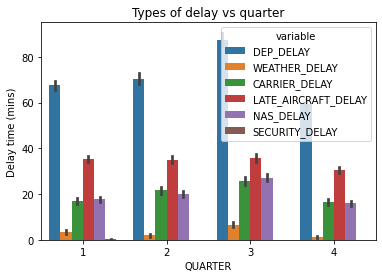

In [8]:

plt.figure()
df_melted = flights.reset_index().melt(id_vars='QUARTER', value_vars=['DEP_DELAY','WEATHER_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY','SECURITY_DELAY' ])
sb.barplot(data=df_melted, x='QUARTER', y='value', hue='variable')
plt.xlabel('QUARTER')
plt.ylabel('Delay time (mins)')
plt.title("Types of delay vs quarter");


# VISUALISATION 5
Looking at types of delay and quarter. The 3rd quarter had the most general, weather, carrier and NAS delays. In all quarters, carrier delay and NAS delay seemed to be equal. The late aircraft delay was higher and equal in all quarters slightly less in the 4th. Security delay is negligible. This solidifys that more delays happened in the 3rd quarter.
